In [7]:
from vamana_module import VamanaIndex
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree
import time

In [2]:
def plot_hist(my_dict):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.set_ylabel('Quantity')
    ax.set_ylabel('Out degree')
    plt.bar(my_dict.keys(),height = my_dict.values())
    plt.show()

# Toy Example
Searching for NN of (6,6,6,..,6) in a dataset of points inside the unit squares with 2 points manually added: (5.9,5.9,...,5.9), (5.11,5.11,...,5.11)

In [8]:
R = 40
My_index = VamanaIndex()
dataset = np.random.default_rng().uniform(0.0,1.0,(1000,10))
dataset = np.vstack([dataset,[5.9]*10])
dataset = np.vstack([dataset,[5.11]*10])

start = time.time()

My_index.create(dataset)
end = time.time()
print(f'time to create vamana Index:{end - start}')
start = time.time()
adj = My_index.get_adj_matrix()

mst_vamana = minimum_spanning_tree(adj).toarray()

end = time.time()
print(f'time to create MST from vamana index:{end - start}')


start = time.time()
dists = squareform(pdist(dataset))
mst = minimum_spanning_tree(dists).toarray()
end = time.time()
print(f'time to create MST from scratch:{end - start}')
my_dict ={}
for i in range(R+1):
    my_dict[i]= 0
for i in range(len(dataset)):
    my_dict[len(My_index._index[i][1])] +=1

L,V = My_index.search([6]*10,nq = 3)
for i in L:
    print(My_index._index[i.index][0], i.distance)




time to create vamana Index:30.58739161491394
time to create MST from vamana index:0.1017768383026123
time to create MST from scratch:0.20035099983215332
[5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9] 0.3162277660168368
[5.11 5.11 5.11 5.11 5.11 5.11 5.11 5.11 5.11 5.11] 2.8144271175498567
[0.45622067 0.59537239 0.87006932 0.98431503 0.90839098 0.89900698
 0.42521407 0.9643795  0.54766732 0.97471945] 16.57644333960825


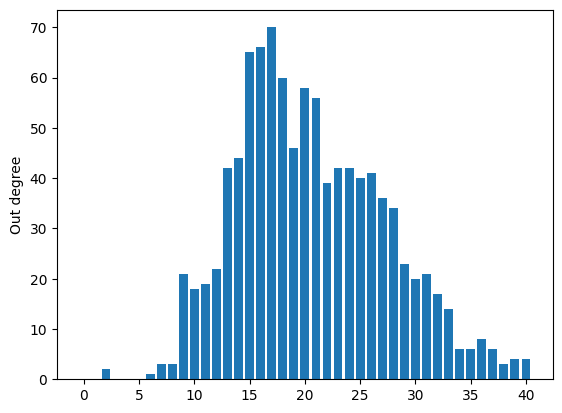

In [5]:
plot_hist(my_dict)

In [9]:
print(adj.shape[0])

1002
